In [1]:
import tensorflow as tf
import pickle
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


print(tf.__version__)

2.7.0


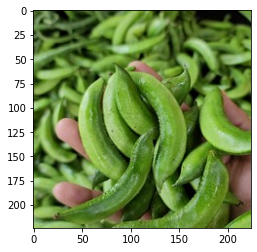

(224, 224, 3)

In [40]:
DATADIR = './Vegetable Images'

CATEGORIES = []

for cat in os.listdir(os.path.join(DATADIR, 'train')):
    CATEGORIES.append(cat)

print("An example image data")
    
for dataset in os.listdir(DATADIR):
    for cat in CATEGORIES:
        path = os.path.join(DATADIR, dataset, cat)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
            plt.show()
            break
        break
    break

img_array.shape

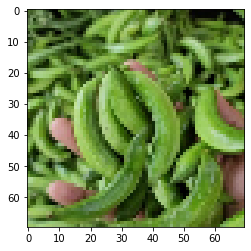

In [41]:
#decrease the image size to a reasonable resolution, tried a couple of numbers here
IMG_SIZE = 70

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [42]:
#read the image data to training, test, and validation datasets

features = {'train': [], 'test': [], 'validation': []}
labels =  {'train': [], 'test': [], 'validation': []}

for dataset in os.listdir(DATADIR):
    for idx, cat in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, dataset, cat)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            
            features.get(dataset).append(new_array)
            labels.get(dataset).append(idx)


In [43]:
features['train'] = np.array(features['train'])
features['validation'] = np.array(features['validation'])
features['test'] = np.array(features['test'])

labels['train'] = np.array(labels['train']).reshape(-1, 1)
labels['validation'] = np.array(labels['validation']).reshape(-1, 1)
labels['test'] = np.array(labels['test']).reshape(-1, 1)

In [44]:
#shuffle the datasets, not really needed for the validation and test sets

for dataset in ['train', 'validation', 'test']:
    features[dataset], labels[dataset] = shuffle(features[dataset], labels[dataset])

In [46]:
# this can be skipped, wanted to save the dataset after preprocessing

"""
for dataset in ['train', 'test', 'validation']:
    pickle_out = open("X_" + dataset + ".pickle", "wb")
    pickle.dump(features[dataset], pickle_out)
    pickle_out.close()
    
    pickle_out = open("y_" + dataset + ".pickle", "wb")
    pickle.dump(labels[dataset], pickle_out)
    pickle_out.close()
"""    

In [47]:
# this is to load the data back in

"""
X_train = pickle.load(open("X_train.pickle", "rb"))
X_test = pickle.load(open("X_test.pickle", "rb"))
X_validation = pickle.load(open("X_validation.pickle", "rb"))

y_train = pickle.load(open("y_train.pickle", "rb"))
y_test = pickle.load(open("y_test.pickle", "rb"))
y_validation = pickle.load(open("y_validation.pickle", "rb"))
"""

In [48]:
## Scale the data

X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0
X_validation_scaled = X_validation / 255.0

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [50]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(len(CATEGORIES), activation=tf.nn.softmax))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 68, 68, 16)        448       
                                                                 
 activation_5 (Activation)   (None, 68, 68, 16)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                  

In [58]:
model.fit(X_train_scaled, to_categorical(y_train),
          batch_size=16, epochs=20, 
          validation_data=(X_validation_scaled, to_categorical(y_validation)))

Epoch 1/20
938/938 [==============================] - 6s 6ms/step - loss: 1.1441 - accuracy: 0.6123 - val_loss: 0.4651 - val_accuracy: 0.8437
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.3802 - accuracy: 0.8800 - val_loss: 0.2665 - val_accuracy: 0.9230
Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2109 - accuracy: 0.9331 - val_loss: 0.2469 - val_accuracy: 0.9293
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1300 - accuracy: 0.9593 - val_loss: 0.1756 - val_accuracy: 0.9510
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0955 - accuracy: 0.9721 - val_loss: 0.2053 - val_accuracy: 0.9440
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0810 - accuracy: 0.9757 - val_loss: 0.2577 - val_accuracy: 0.9263
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0743 - accuracy: 0.9764 - val_loss: 0.1855 - val_accuracy: 0.9540
Epoch 

Label: Radish 
Prediction: Radish 


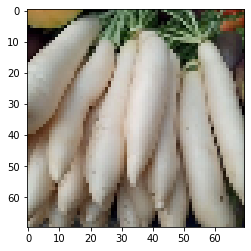

In [67]:
# Examine some examples from validation set

random_idx = np.random.randint(low=0, high=X_validation.shape[0])

label = y_validation[random_idx][0]
prediction = np.argmax(model.predict(X_validation_scaled[random_idx:random_idx+1, :, :, :]))
print("Label: {} ".format(CATEGORIES[label]))
print("Prediction: {} ".format(CATEGORIES[prediction]))
plt.imshow(cv2.cvtColor(X_validation[random_idx], cv2.COLOR_BGR2RGB))
plt.show()

In [68]:
## Evaluate the model on the test set, should have an accuracy ~96%
model.evaluate(X_test_scaled, to_categorical(y_test))

94/94 [==============================] - 1s 5ms/step - loss: 0.2379 - accuracy: 0.9600


[0.23786437511444092, 0.9599999785423279]

Label: Pumpkin 
Prediction: Cabbage 


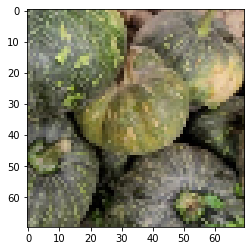

In [88]:
# Examine some mislabeled examples 

test_preds_onehot = model.predict(X_test_scaled)
test_preds = np.argmax(test_preds_onehot, axis=1).reshape(-1, 1)
random_idx = np.random.choice(np.where(test_preds != y_test)[0])

label = y_test[random_idx][0]
prediction = np.argmax(model.predict(X_test_scaled[random_idx:random_idx+1, :, :, :]))
print("Label: {} ".format(CATEGORIES[label]))
print("Prediction: {} ".format(CATEGORIES[prediction]))
plt.imshow(cv2.cvtColor(X_test[random_idx], cv2.COLOR_BGR2RGB))
plt.show()